<a href="https://www.kaggle.com/kalilurrahman/top-box-office-movies-analysis?scriptVersionId=89683184" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-box-office-revenue-data-english-movies/bomojobrandindices.csv
/kaggle/input/top-box-office-revenue-data-english-movies/boxofficemojotopgenres.tsv
/kaggle/input/top-box-office-revenue-data-english-movies/boxofficemojotopfranchises.tsv
/kaggle/input/top-box-office-revenue-data-english-movies/boxofficemojobrandindices.tsv
/kaggle/input/top-box-office-revenue-data-english-movies/boxofficemojointernationaltop1000.tsv
/kaggle/input/top-box-office-revenue-data-english-movies/boxofficemojoustop1000.tsv


In [2]:
brandindices = pd.read_csv("../input/top-box-office-revenue-data-english-movies/boxofficemojobrandindices.tsv", sep='\t')
print(brandindices.shape)
brandindices.head(n=10)

(45, 5)


Brand        Total  Releases  \
0                  Marvel Comics  15806336901        69   
1             Legendary Pictures   7018798067        56   
2                      Lucasfilm   6325022918        39   
3                          Pixar   6078217662        28   
4                      DC Comics   5815645953        46   
5           DreamWorks Animation   5792217737        41   
6          Vertigo Entertainment   3154664176        41   
7                      Bad Robot   3077078931        15   
8  Walt Disney Animation Studios   2774912904        15   
9     Illumination Entertainment   2759505881        13   

                                   #1 Release  Lifetime Gross  
0                           Avengers: Endgame       858373000  
1                              Jurassic World       652270625  
2  Star Wars: Episode VII - The Force Awakens       936662225  
3                               Incredibles 2       608581744  
4                             The Dark Knight       533345358  
5                                     Shrek 2       441226247  
6                                          It       327481748  
7  Star Wars: Episode VII - The Force Awakens       936662225  
8                                   Frozen II       477373578  
9                     The Secret Life of Pets       368384330

In [3]:
franchises = pd.read_csv("../input/top-box-office-revenue-data-english-movies/boxofficemojotopfranchises.tsv", sep='\t')
print(franchises.shape)
franchises.head(n=10)

(292, 5)


Franchise       Total  Releases  \
0        Marvel Cinematic Universe  9892046843        30   
1                        Star Wars  5081703177        21   
2  Disney Live Action Reimaginings  3493794115        17   
3                       Spider-Man  3269168524        10   
4   J.K. Rowling's Wizarding World  2787740350        27   
5                         Avengers  2619552260         4   
6                            X-Men  2458462356        14   
7                           Batman  2411044358        18   
8                     Harry Potter  2394146874        25   
9                       James Bond  2273796409        26   

                                     #1 Release  Lifetime Gross  
0                             Avengers: Endgame       858373000  
1    Star Wars: Episode VII - The Force Awakens       936662225  
2                                 The Lion King       543638043  
3                       Spider-Man: No Way Home       772170405  
4  Harry Potter and the Deathly Hallows: Part 2       381011219  
5                             Avengers: Endgame       858373000  
6                                      Deadpool       363070709  
7                               The Dark Knight       533345358  
8  Harry Potter and the Deathly Hallows: Part 2       381011219  
9                                       Skyfall       304360277

In [4]:
genres = pd.read_csv("../input/top-box-office-revenue-data-english-movies/boxofficemojotopgenres.tsv", sep='\t')
print(genres .shape)
genres .head(n=10)

(245, 5)


Genre        Total  Titles  \
0                Heroine   8513688318      82   
1              Adventure  68146286235     877   
2           Supernatural  60041261115     750   
3                   IMAX  56249895595     372   
4                     3D  50745498053     394   
5  Comic Book Adaptation  25665243979     181   
6               Invasion   7243530273      58   
7              Superhero  24227315180     146   
8               Invasion   7243530273      58   
9             Adaptation  72848144854     963   

                                     #1 Title  Lifetime Gross  
0  Star Wars: Episode VII - The Force Awakens       936662225  
1  Star Wars: Episode VII - The Force Awakens       936662225  
2  Star Wars: Episode VII - The Force Awakens       936662225  
3  Star Wars: Episode VII - The Force Awakens       936662225  
4  Star Wars: Episode VII - The Force Awakens       936662225  
5                           Avengers: Endgame       858373000  
6                           Avengers: Endgame       858373000  
7                           Avengers: Endgame       858373000  
8                           Avengers: Endgame       858373000  
9                           Avengers: Endgame       858373000

In [5]:
ustop1000 = pd.read_csv("../input/top-box-office-revenue-data-english-movies/boxofficemojoustop1000.tsv", sep='\t')
print(ustop1000 .shape)
ustop1000.head(n=10)


(1000, 4)


Rank                                       Movie  Lifetime Gross  Year
0     1  Star Wars: Episode VII - The Force Awakens       936662225  2015
1     2                           Avengers: Endgame       858373000  2019
2     3                     Spider-Man: No Way Home       772170405  2021
3     4                                      Avatar       760507625  2009
4     5                               Black Panther       700426566  2018
5     6                      Avengers: Infinity War       678815482  2018
6     7                                     Titanic       659363944  1997
7     8                              Jurassic World       652385625  2015
8     9                                The Avengers       623357910  2012
9    10     Star Wars: Episode VIII - The Last Jedi       620181382  2017

In [6]:
internationaltop1000 = pd.read_csv("../input/top-box-office-revenue-data-english-movies/boxofficemojointernationaltop1000.tsv", sep='\t')
print(internationaltop1000 .shape)
internationaltop1000.head(n=10)

(1000, 8)


Rank                                       Title  Worldwide Lifetime Gross  \
0     1                                      Avatar                2847246203   
1     2                           Avengers: Endgame                2797501328   
2     3                                     Titanic                2201647264   
3     4  Star Wars: Episode VII 0 The Force Awakens                2069521700   
4     5                      Avengers: Infinity War                2048359754   
5     6                     Spider0Man: No Way Home                1832170405   
6     7                              Jurassic World                1670516444   
7     8                               The Lion King                1662899439   
8     9                                The Avengers                1518815515   
9    10                                   Furious 7                1515341399   

   Domestic Lifetime Gross   Domestic %   Foreign Lifetime Gross   Foreign %   \
0                760507625          0.27              2086738578         0.73   
1                858373000          0.31              1939128328         0.69   
2                659363944          0.30              1542283320         0.70   
3                936662225          0.45              1132859475         0.55   
4                678815482          0.33              1369544272         0.67   
5                772170405          0.42              1060000000         0.58   
6                652385625          0.39              1018130819         0.61   
7                543638043          0.33              1119261396         0.67   
8                623357910          0.41               895457605         0.59   
9                353007020          0.23              1162334379         0.77   

   Year  
0  2009  
1  2019  
2  1997  
3  2015  
4  2018  
5  2021  
6  2015  
7  2019  
8  2012  
9  2015

In [7]:
print(internationaltop1000.info())
print(ustop1000.info())
print(genres.info())
print(franchises.info())
print(brandindices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      1000 non-null   int64  
 1   Title                     1000 non-null   object 
 2   Worldwide Lifetime Gross  1000 non-null   int64  
 3   Domestic Lifetime Gross   1000 non-null   int64  
 4    Domestic %               1000 non-null   float64
 5   Foreign Lifetime Gross    1000 non-null   int64  
 6    Foreign %                1000 non-null   float64
 7   Year                      1000 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            1000 non-null   int64 
 1   Movie           1000 non-null   obj

In [8]:
brandindices["Total"] = brandindices["Total"].astype(str).astype(int)
brandindices["Lifetime Gross"] = brandindices["Lifetime Gross"].astype(str).astype(int)
franchises["Total"] = franchises["Total"].astype(str).astype(int)
franchises["Lifetime Gross"] = franchises["Lifetime Gross"].astype(str).astype(int)
genres["Total"] = genres["Total"].astype(str).astype(int)
genres["Titles"] = genres["Titles"].astype(str).astype(int)
genres["Lifetime Gross"] = genres["Lifetime Gross"].astype(str).astype(int)
internationaltop1000["Worldwide Lifetime Gross"] = internationaltop1000["Worldwide Lifetime Gross"].astype(int)
internationaltop1000["Domestic Lifetime Gross"] = internationaltop1000["Domestic Lifetime Gross"].astype(str).astype(int)
internationaltop1000["Foreign Lifetime Gross"] = internationaltop1000["Foreign Lifetime Gross"].astype(str).astype(int)
ustop1000["Lifetime Gross"] = ustop1000["Lifetime Gross"].astype(str).astype(int)


In [9]:
print(internationaltop1000.isna().sum())
print(ustop1000.isna().sum())
print(genres.isna().sum())
print(franchises.isna().sum())
print(brandindices.isna().sum())

Rank                        0
Title                       0
Worldwide Lifetime Gross    0
Domestic Lifetime Gross     0
 Domestic %                 0
Foreign Lifetime Gross      0
 Foreign %                  0
Year                        0
dtype: int64
Rank              0
Movie             0
Lifetime Gross    0
Year              0
dtype: int64
Genre             0
Total             0
Titles            0
#1 Title          0
Lifetime Gross    0
dtype: int64
Franchise         0
Total             0
Releases          0
#1 Release        0
Lifetime Gross    0
dtype: int64
Brand             0
Total             0
Releases          0
#1 Release        0
Lifetime Gross    0
dtype: int64


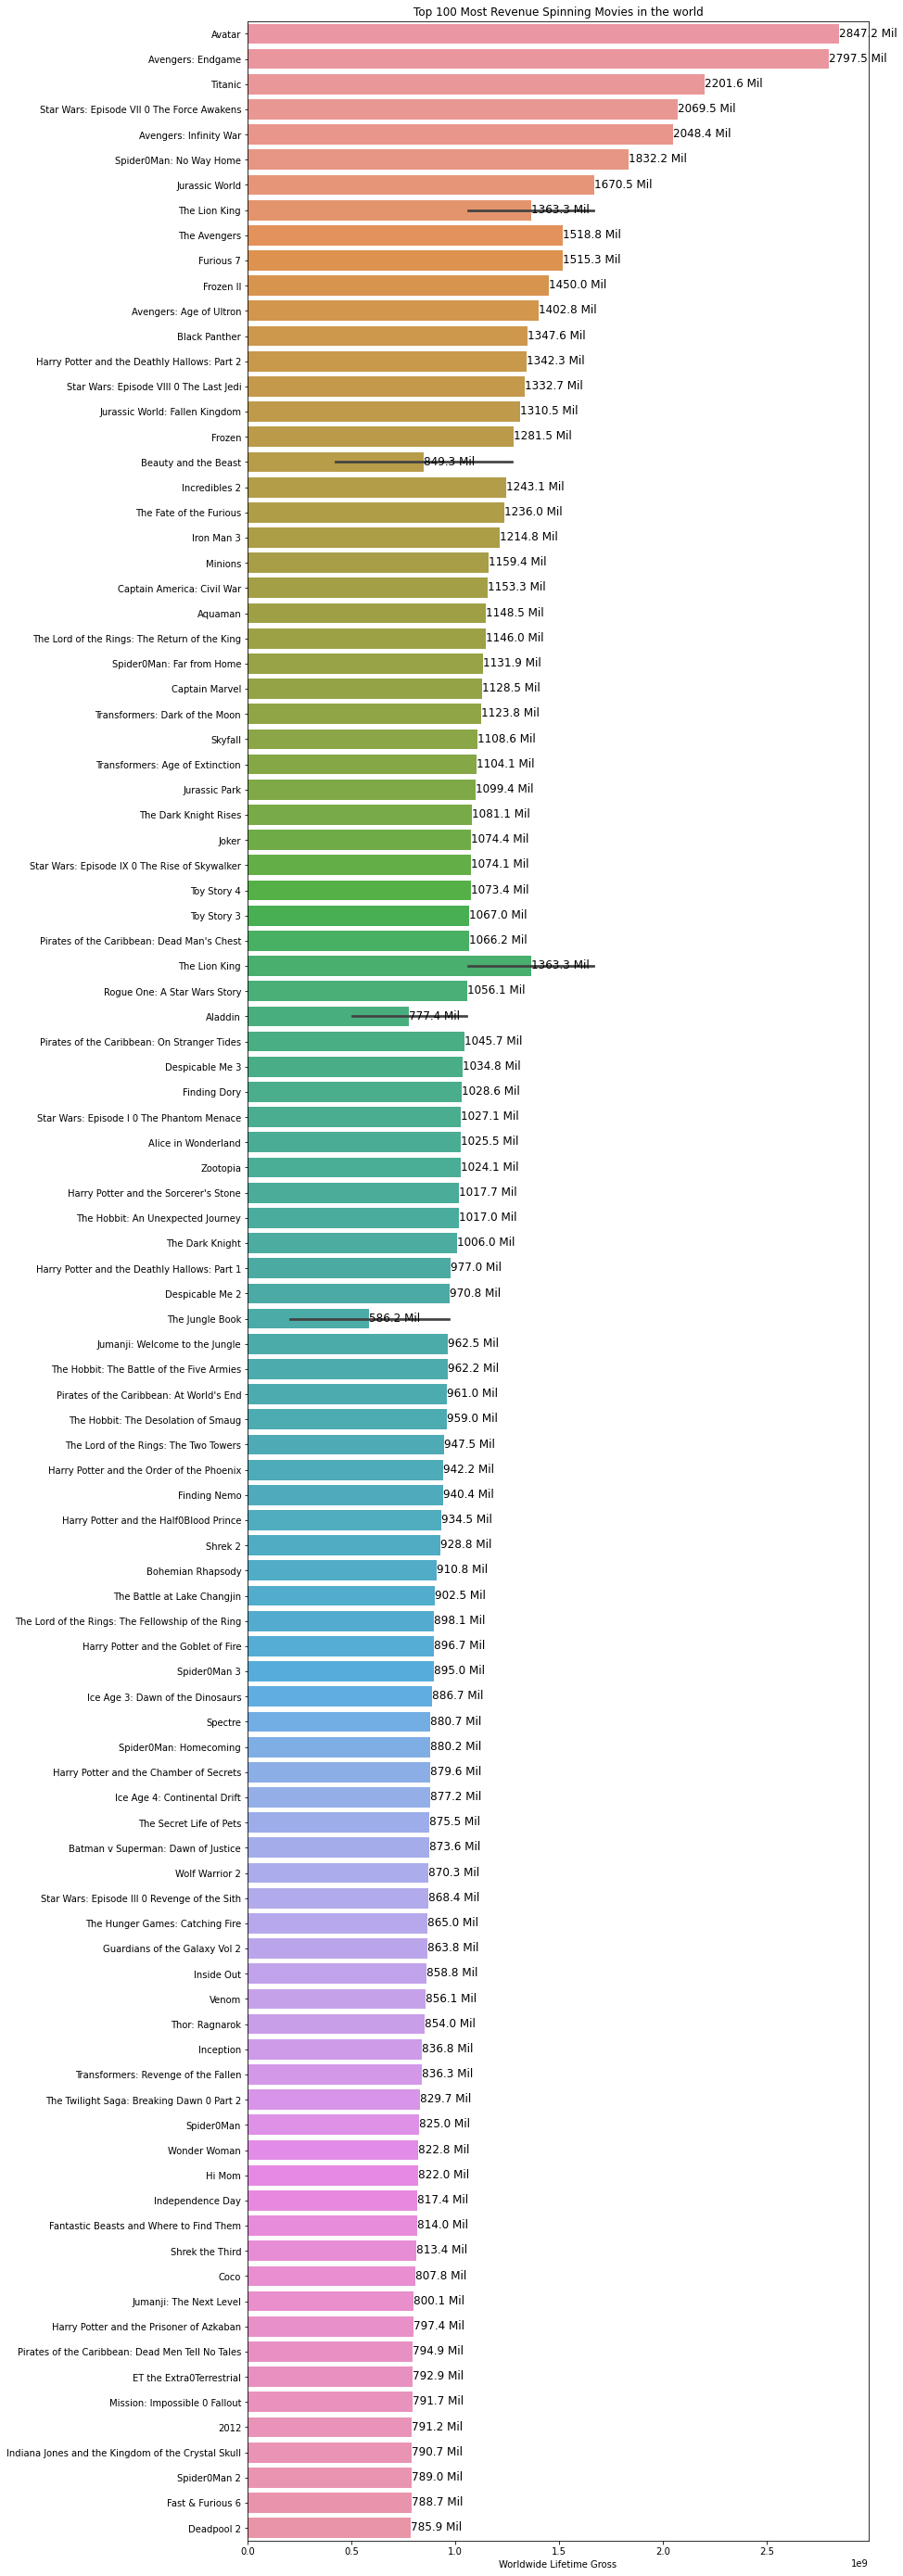

In [10]:
plt.figure(figsize=(12, 50))
ax = sns.barplot(y='Title', x='Worldwide Lifetime Gross', data=internationaltop1000, 
                 order=internationaltop1000.sort_values('Worldwide Lifetime Gross',
                                                        ascending=False).Title.head(100), 
                 orient='h')
for p in ax.patches:
        ax.annotate('{:.1f} Mil'.format(int(p.get_width())/1000000), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 100 Most Revenue Spinning Movies in the world', fontsize=12)
plt.ylabel('')
plt.show()

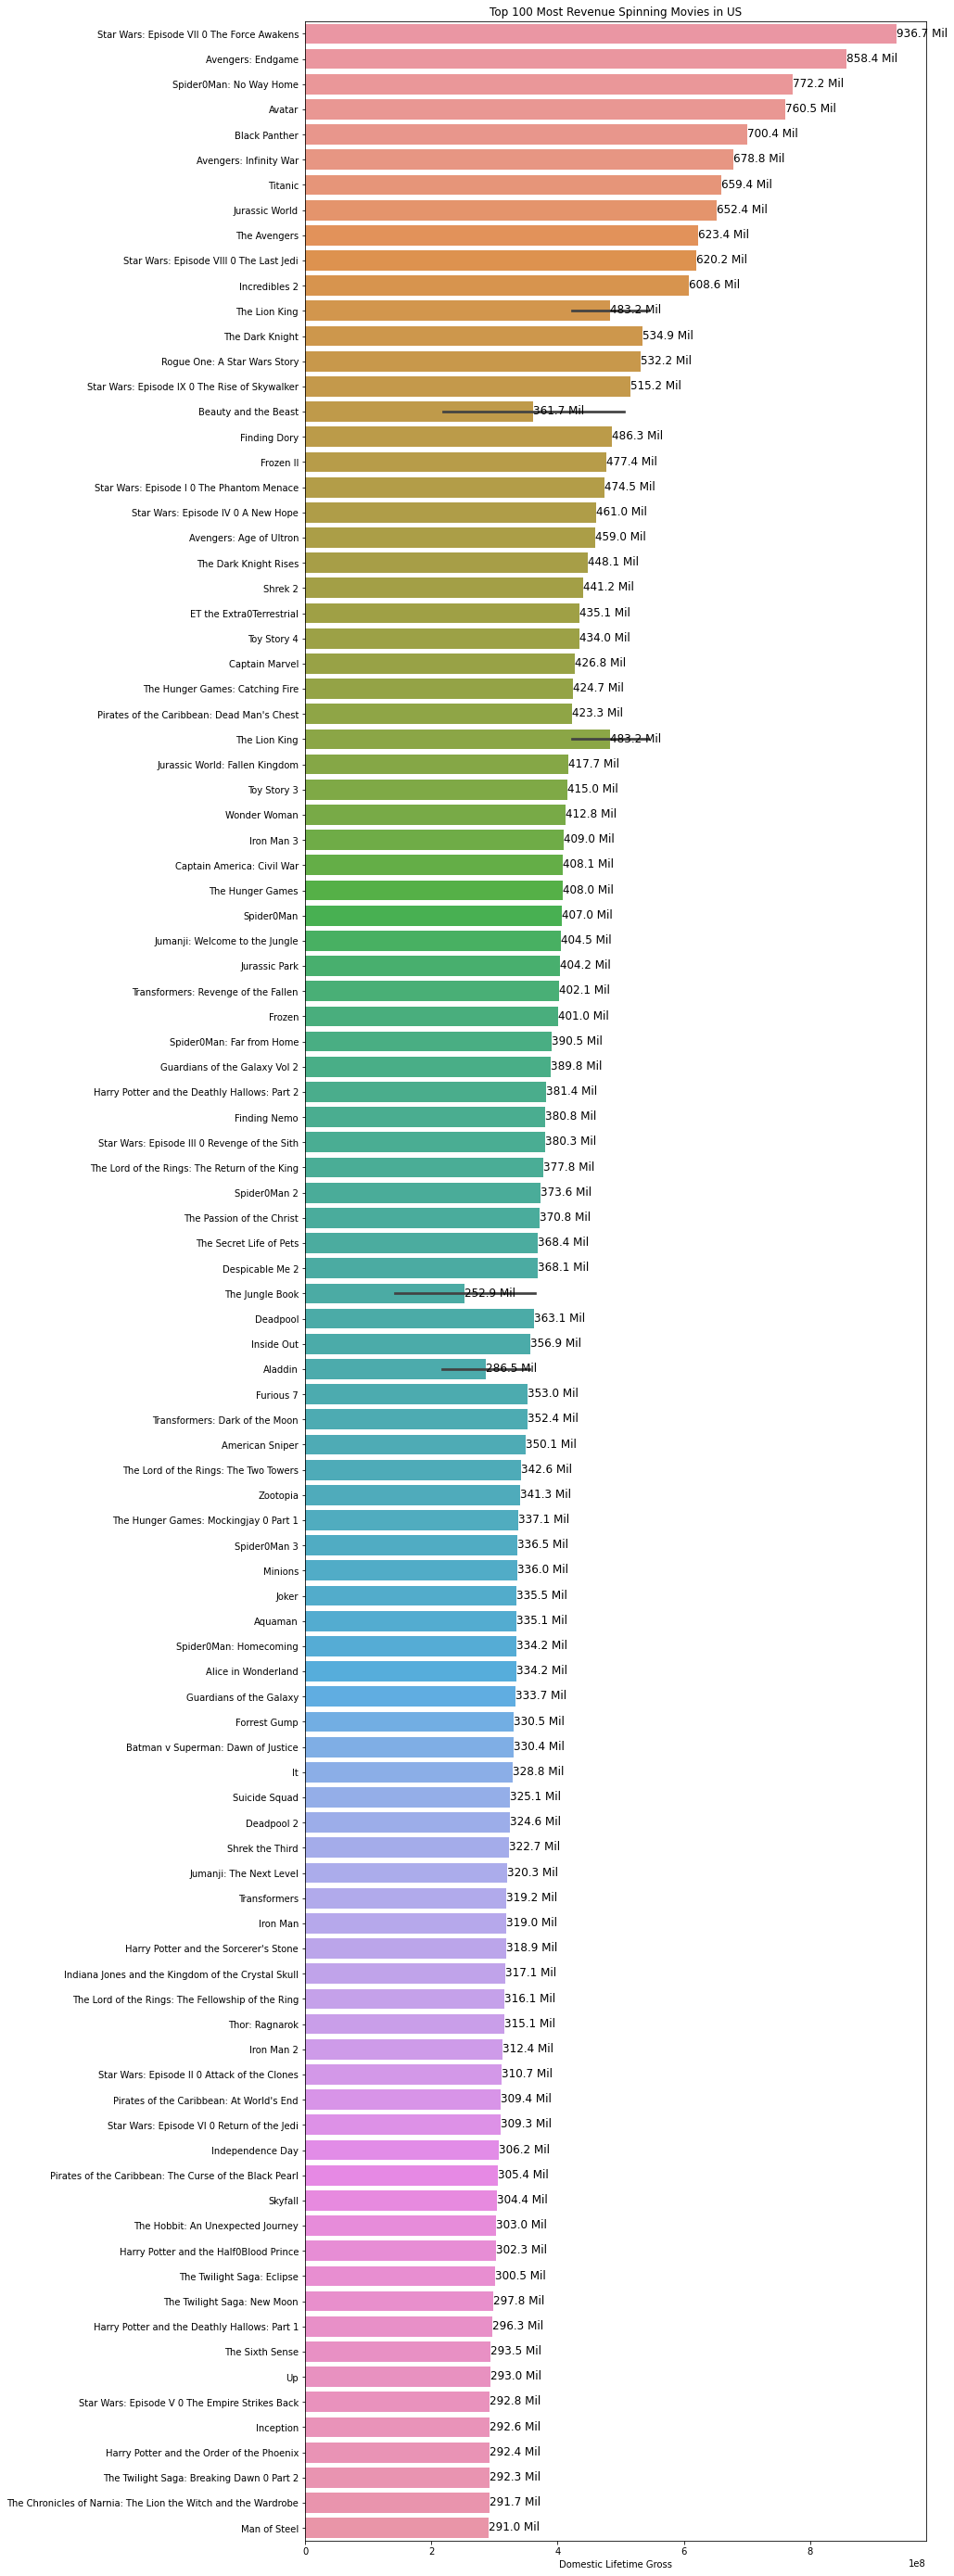

In [11]:
plt.figure(figsize=(12, 50))
ax = sns.barplot(y='Title', x='Domestic Lifetime Gross', data=internationaltop1000, 
                 order=internationaltop1000.sort_values('Domestic Lifetime Gross',
                                                        ascending=False).Title.head(100), 
                 orient='h')
for p in ax.patches:
        ax.annotate('{:.1f} Mil'.format(int(p.get_width())/1000000), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 100 Most Revenue Spinning Movies in US', fontsize=12)
plt.ylabel('')
plt.show()

(31.5, 53.5)

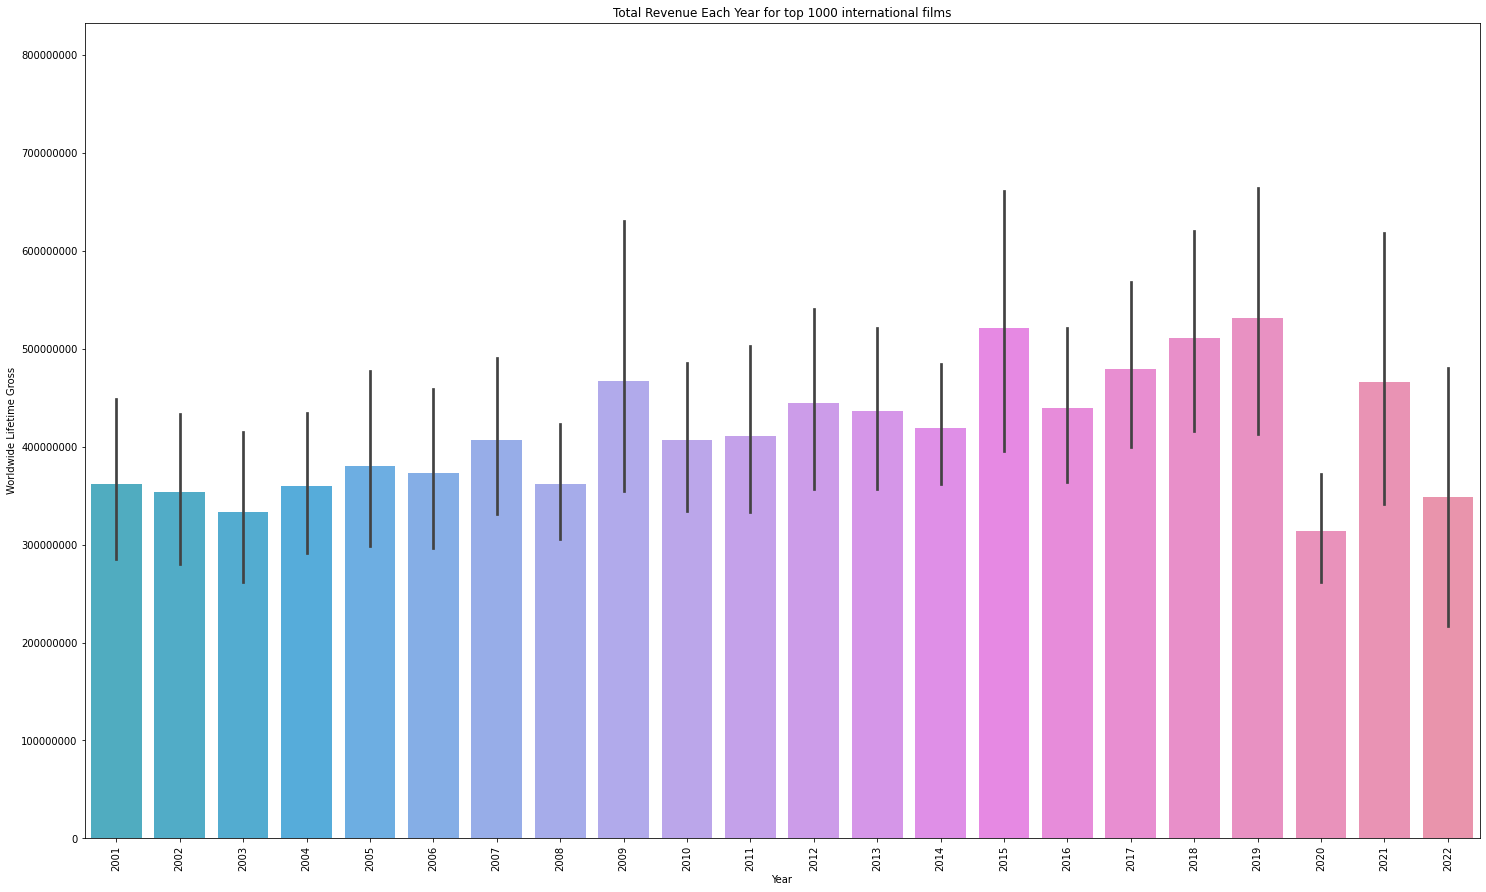

In [12]:
plt.figure(figsize=(25, 15))
sns.barplot(x='Year', y='Worldwide Lifetime Gross', data=internationaltop1000)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Total Revenue Each Year for top 1000 international films')
ax.set_xlim(left=31.5)

(31.5, 53.5)

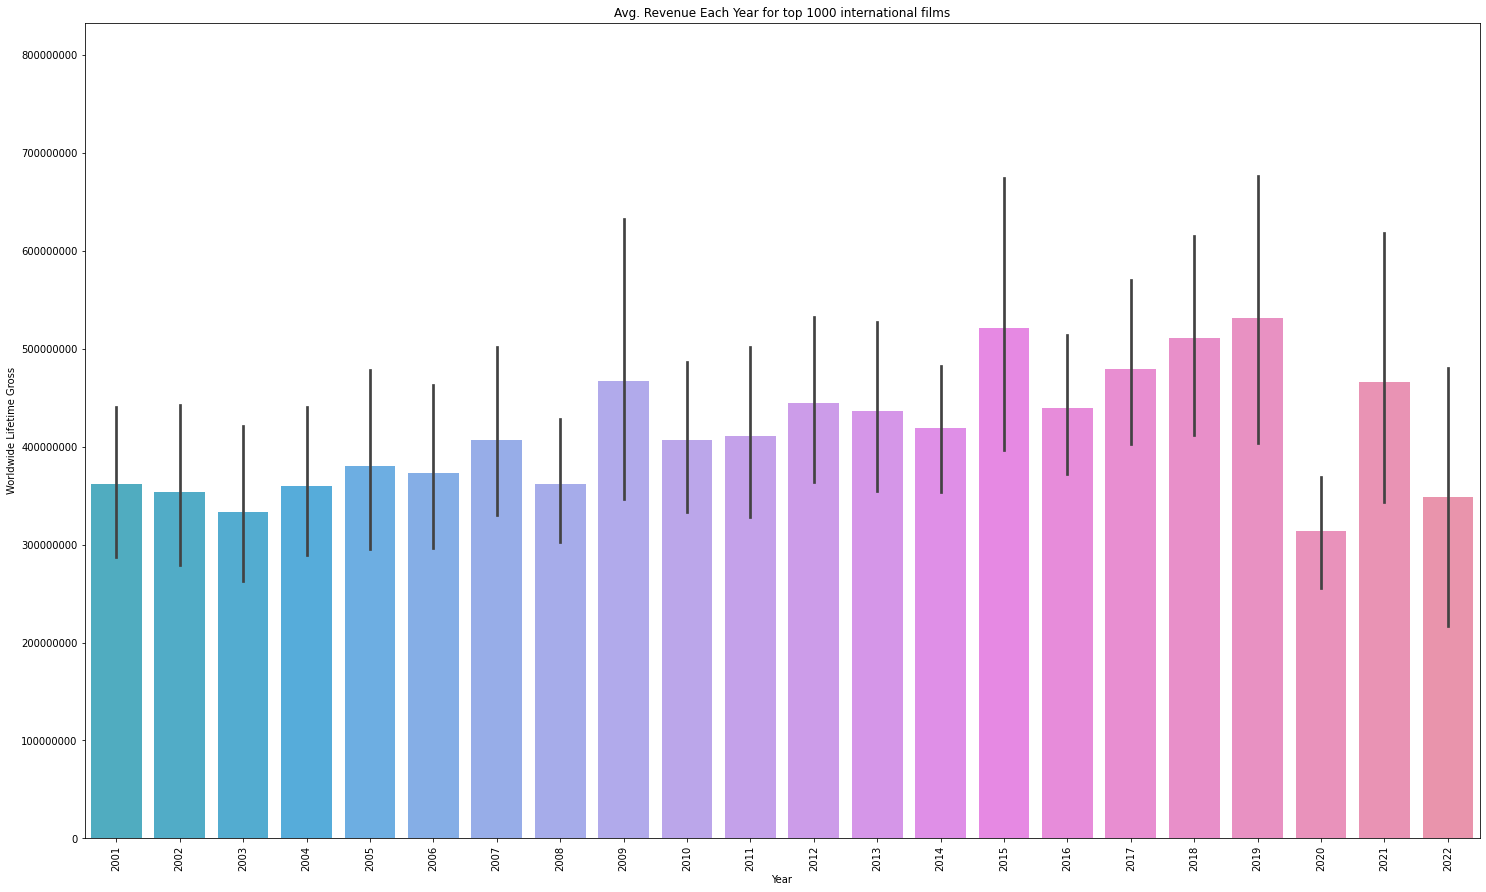

In [13]:
plt.figure(figsize=(25, 15))
sns.barplot(x='Year', y='Worldwide Lifetime Gross', data=internationaltop1000, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Each Year for top 1000 international films')
ax.set_xlim(left=31.5)

In [14]:
# Source credit - https://www.kaggle.com/sherli/tmdb-boxoffice-revenue-prediction 
def boxplot_sorted(df, by, column):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.mean().sort_values(ascending=False)
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot()

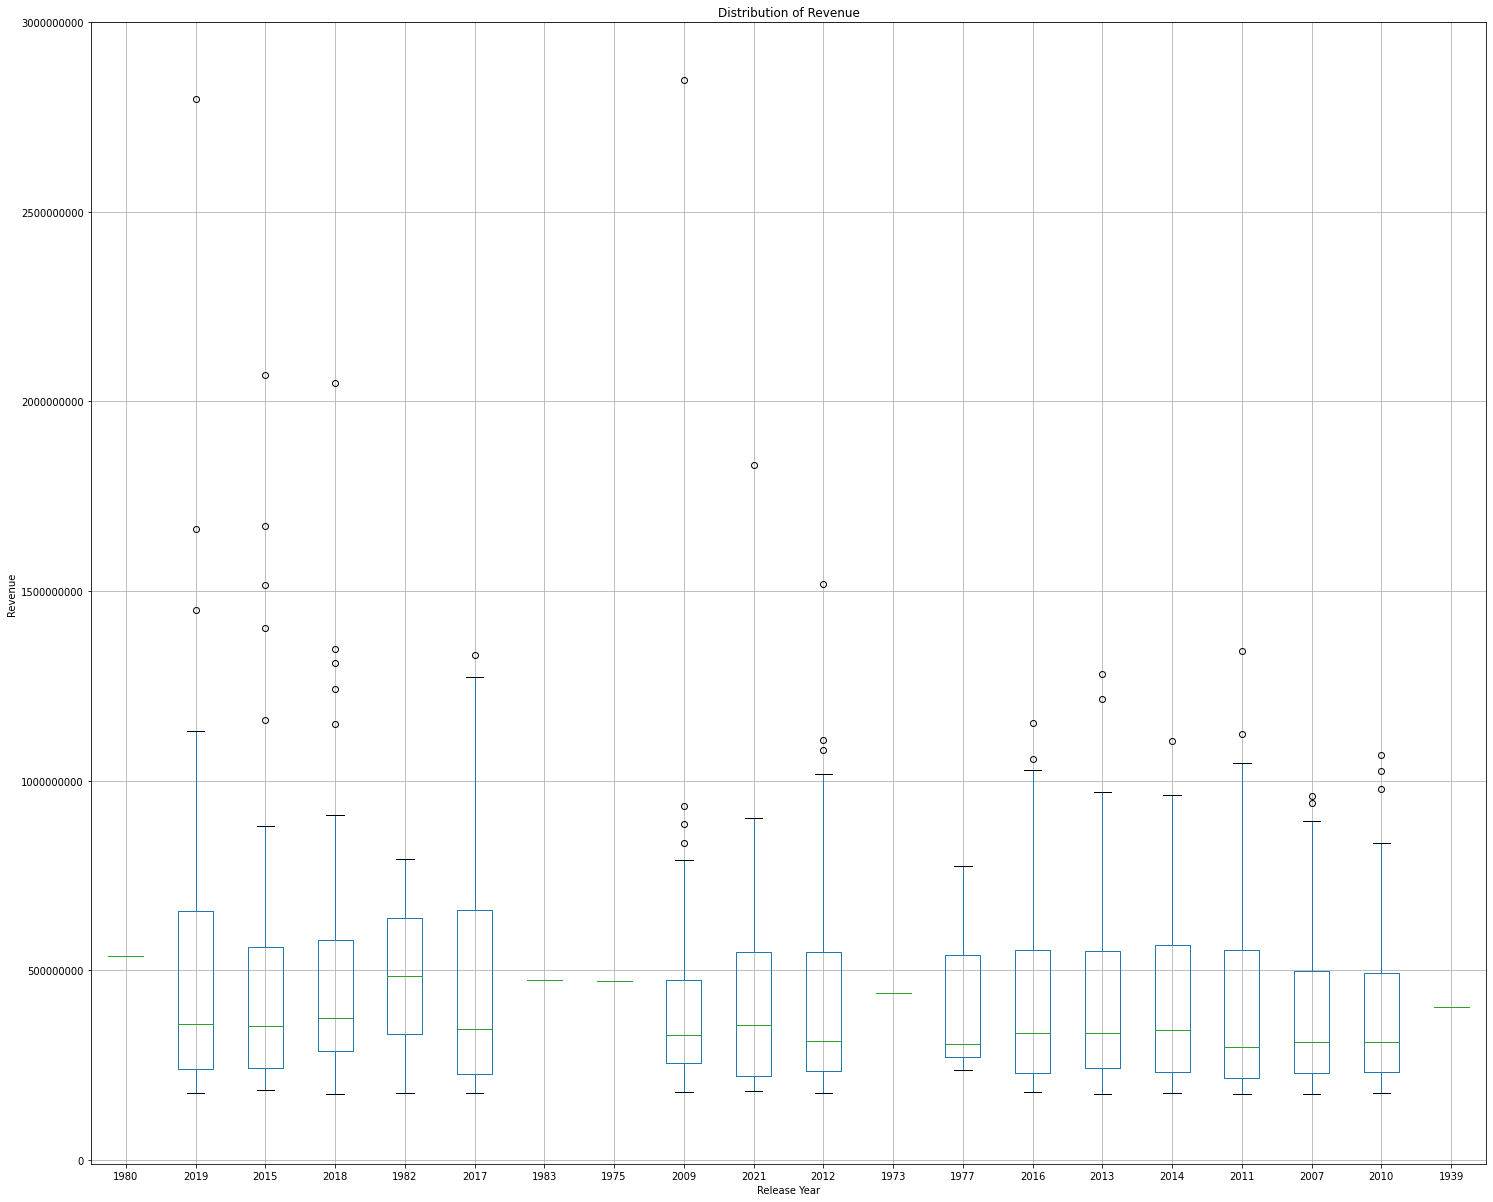

In [15]:
plt.figure(figsize=(25, 21))
axes = boxplot_sorted(internationaltop1000, by = ['Year'], column = 'Worldwide Lifetime Gross')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim((-10000000, 3000000000))
ax.set_xlim(right=20.5)
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue')
plt.show()

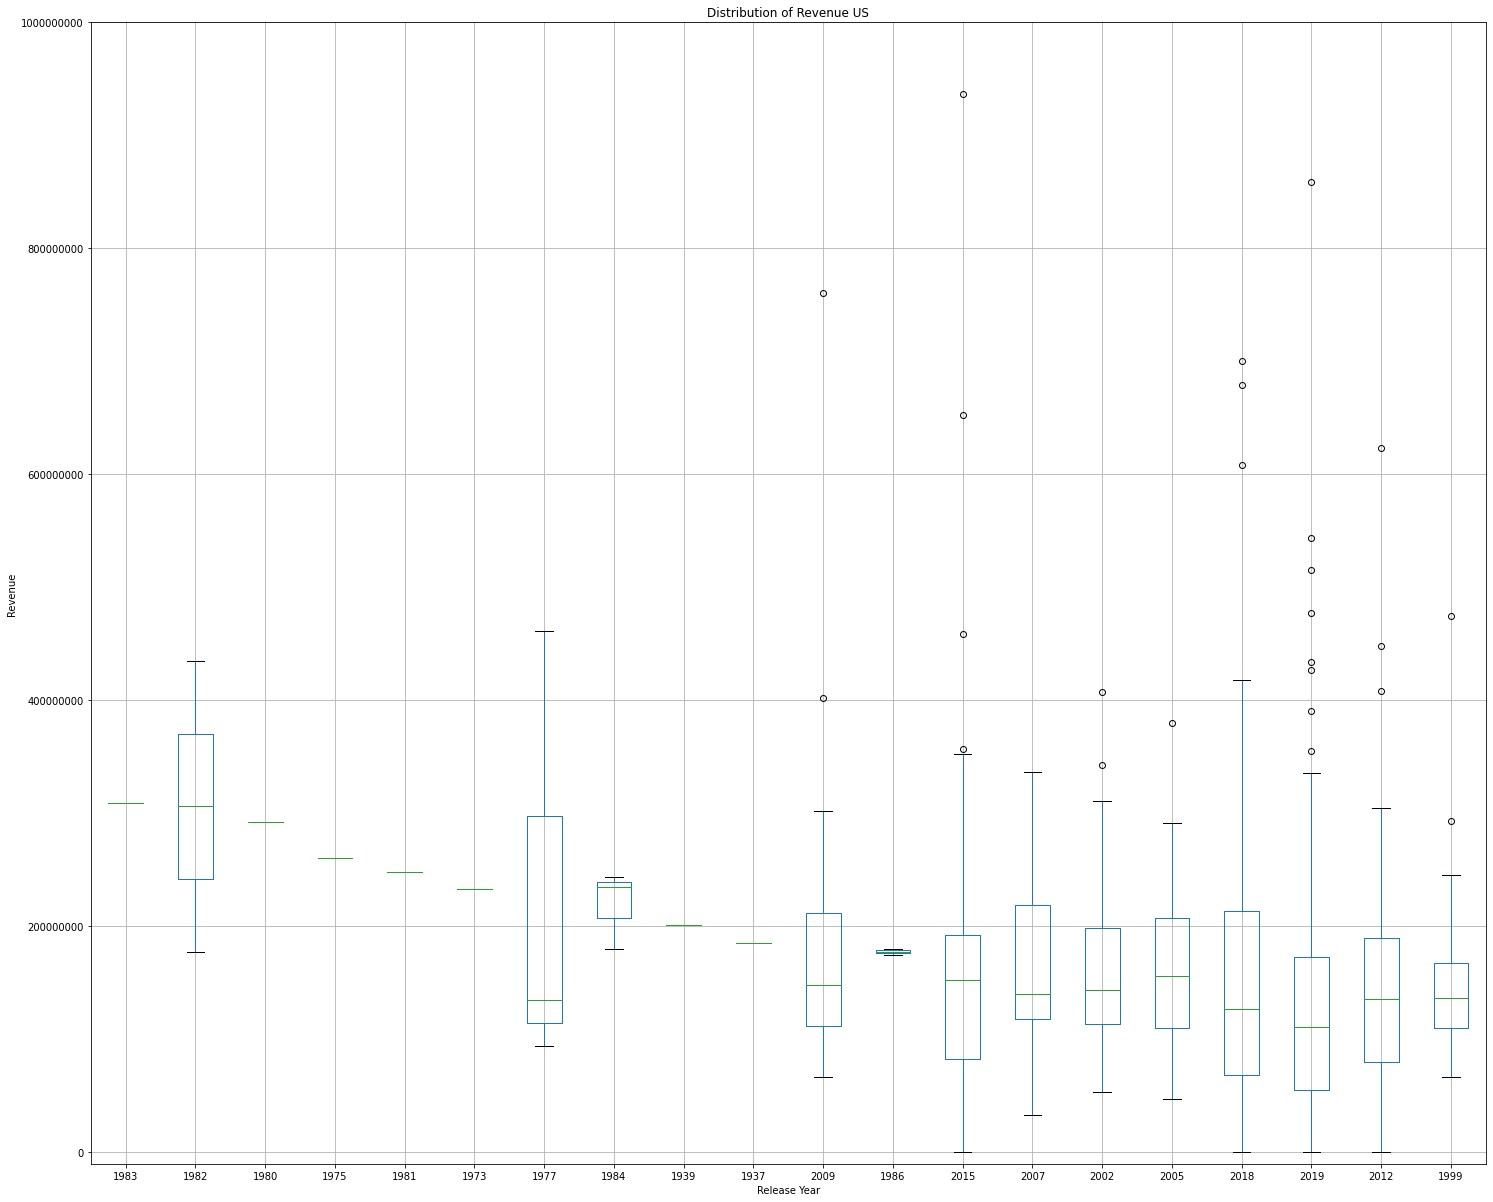

In [16]:
plt.figure(figsize=(25, 21))
axes = boxplot_sorted(internationaltop1000, by = ['Year'], column = 'Domestic Lifetime Gross')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim((-10000000, 1000000000))
ax.set_xlim(right=20.5)
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue US')
plt.show()

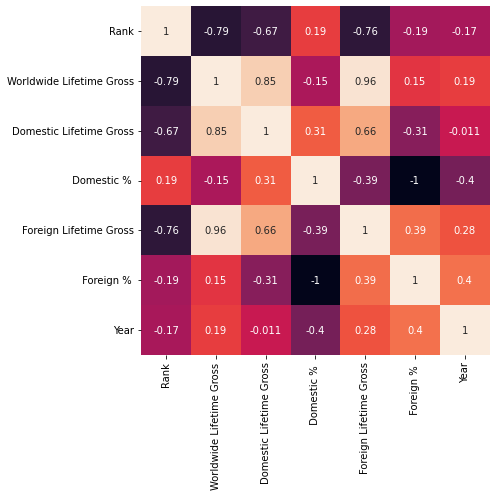

In [17]:
plt.figure(figsize=(12, 7))
corr_matrix = internationaltop1000.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False)
plt.tight_layout()

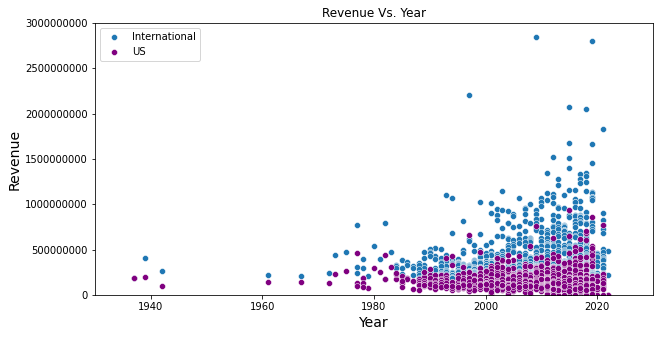

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Year', y='Worldwide Lifetime Gross', data=internationaltop1000, label='International')
sns.scatterplot(x='Year', y='Domestic Lifetime Gross', data=internationaltop1000, color='purple', label='US')
plt.ylim(0, 3000000000)
plt.xlim(1930, 2030)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Year')
plt.show()

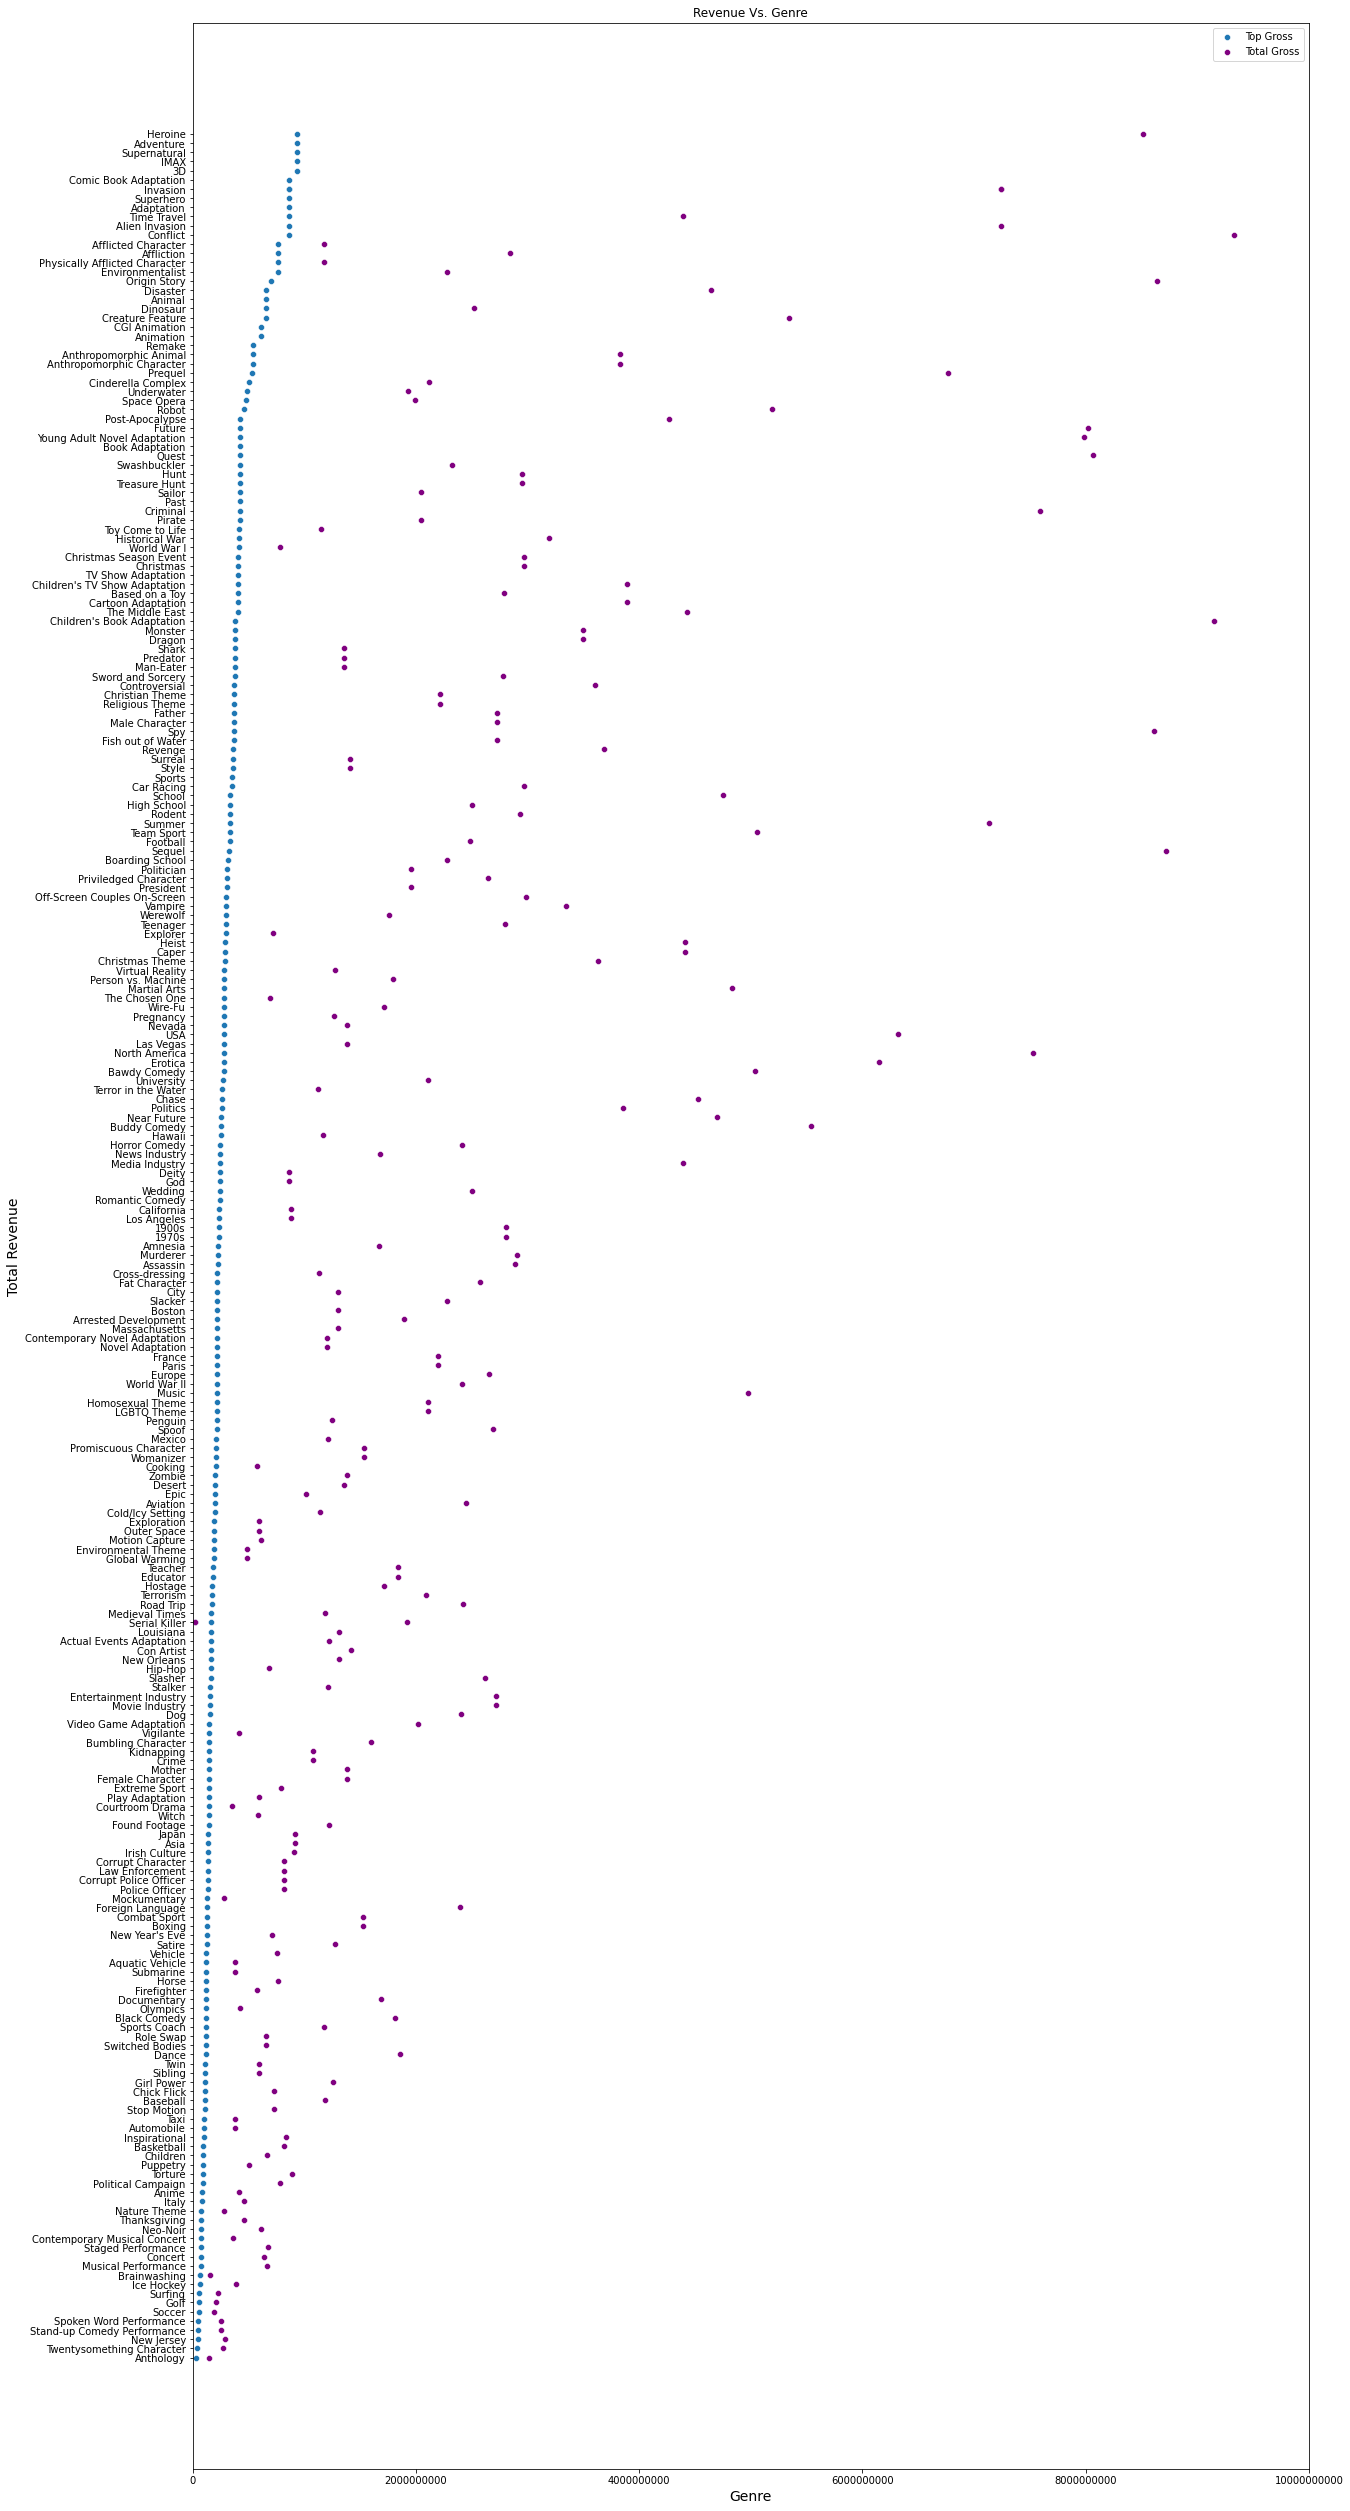

In [19]:
plt.figure(figsize=(20, 45))
sns.scatterplot(y='Genre', x='Lifetime Gross', data=genres, label='Top Gross')
sns.scatterplot(y='Genre', x='Total', data=genres, color='purple', label='Total Gross')
plt.xlim(0, 10000000000)
#plt.xlim(1930, 2030)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
#ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Genre')
plt.show()

In [20]:
genres.columns

Index(['Genre', 'Total', 'Titles', '#1 Title', 'Lifetime Gross'], dtype='object')

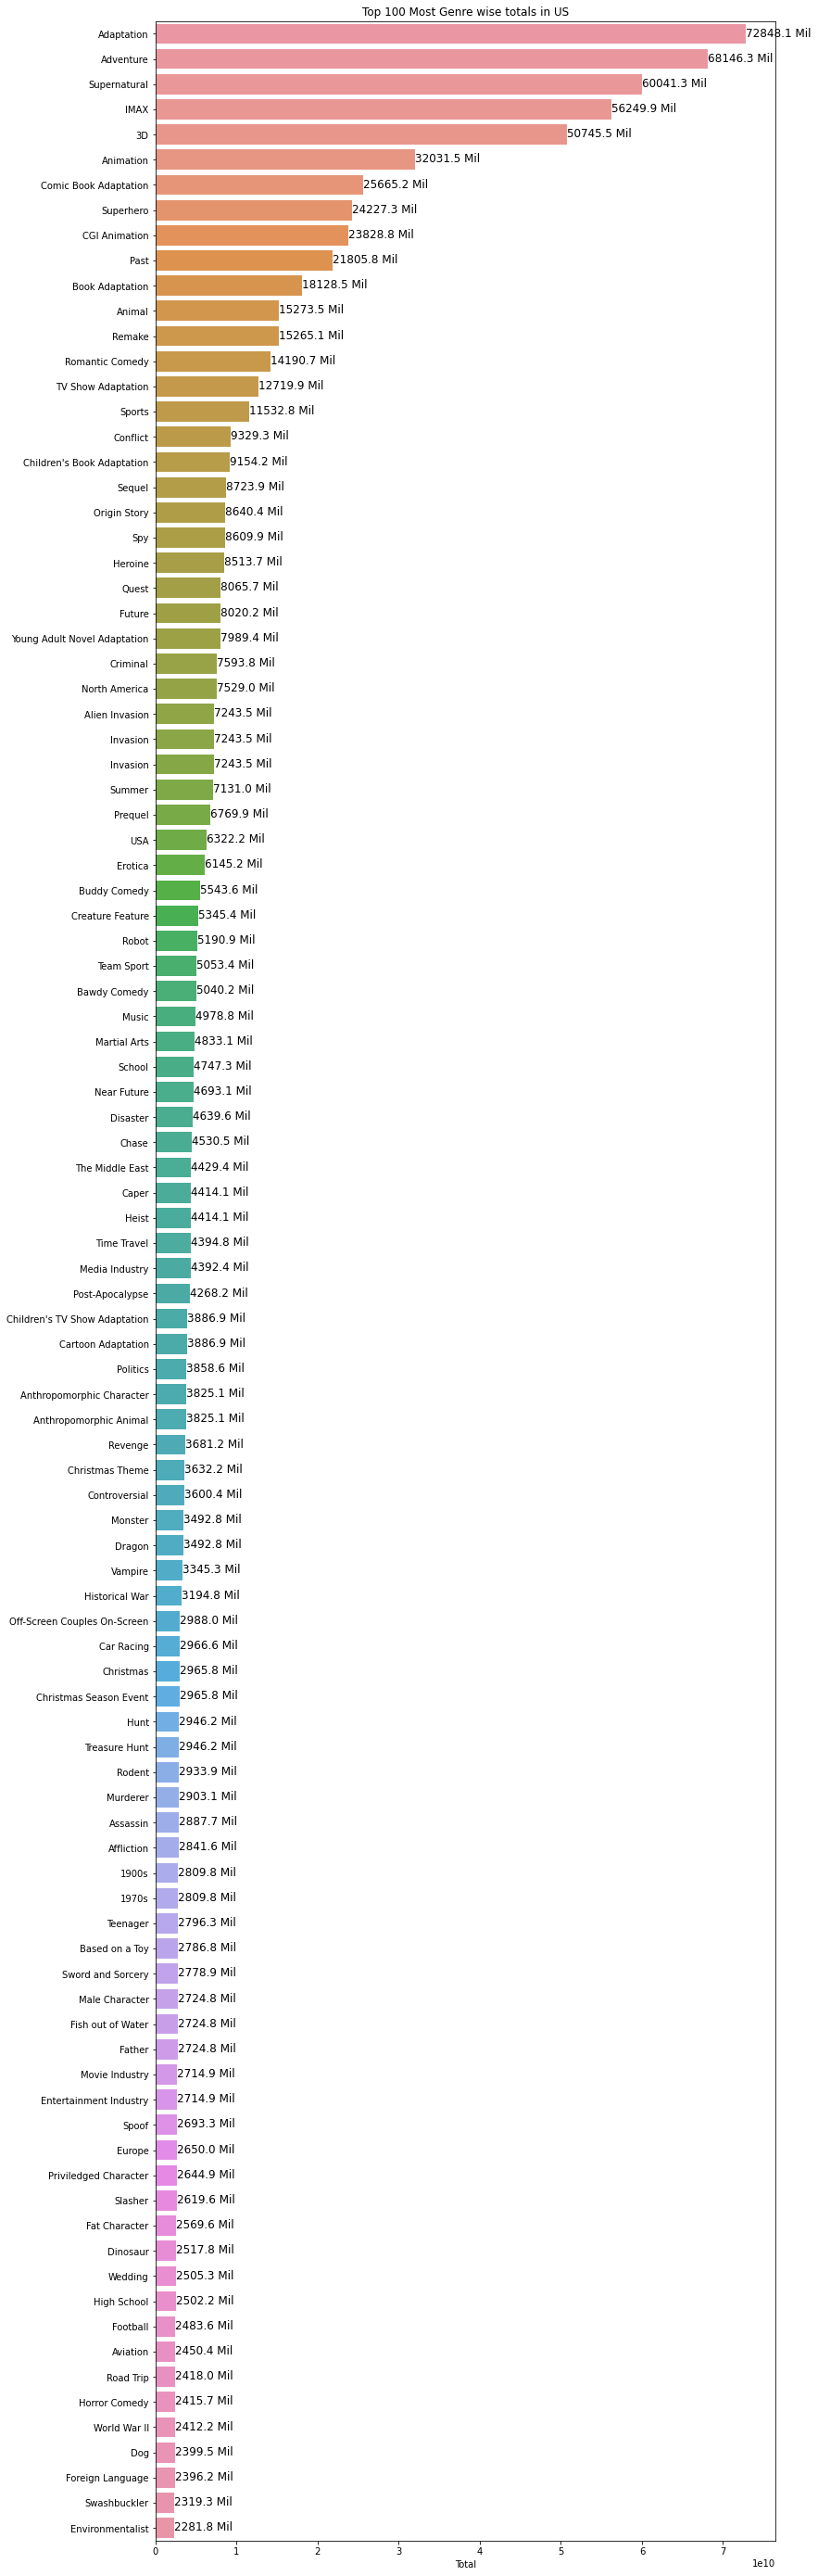

In [21]:
plt.figure(figsize=(12, 50))
ax = sns.barplot(y='Genre', x='Total', data=genres, 
                 order=genres.sort_values('Total',
                                          ascending=False).Genre.head(100), 
                 orient='h')
for p in ax.patches:
        ax.annotate('{:.1f} Mil'.format(int(p.get_width())/1000000), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 100 Most Genre wise totals in US', fontsize=12)
plt.ylabel('')
plt.show()



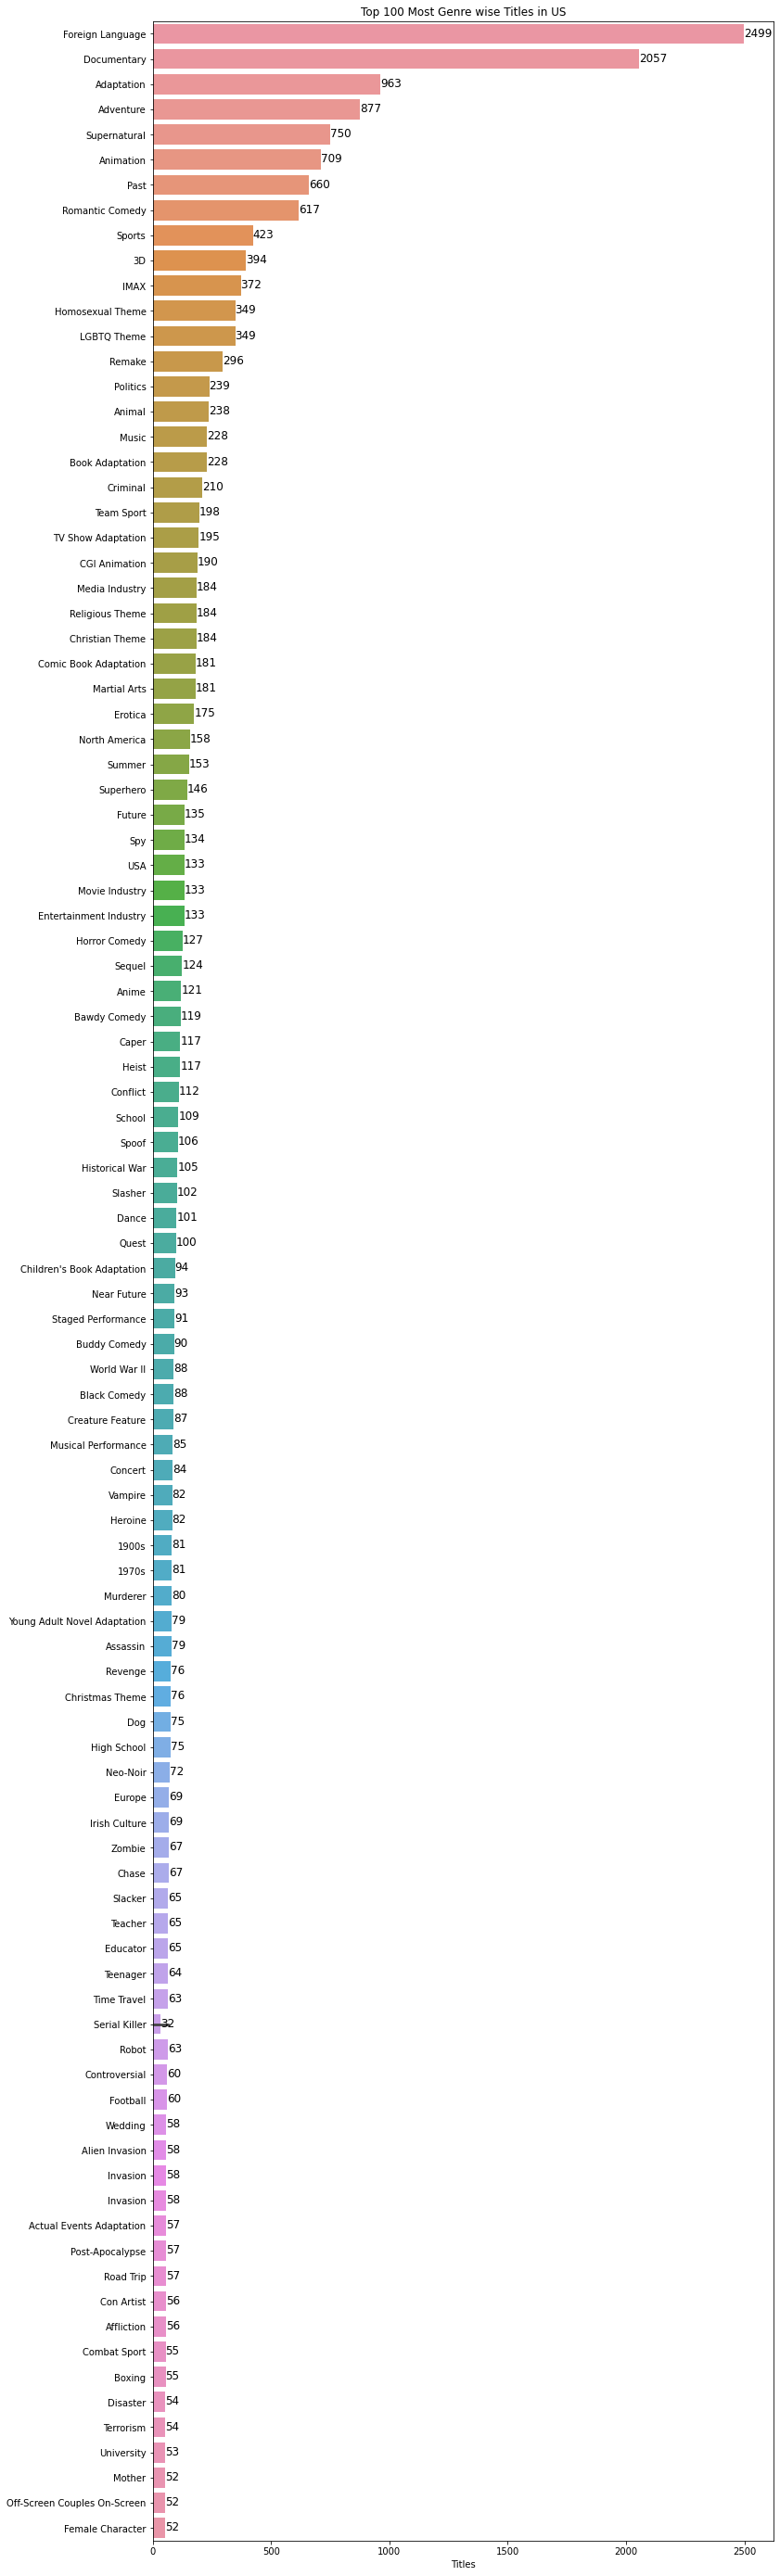

In [22]:
plt.figure(figsize=(12, 50))
#1 Title', 'Lifetime Gross
ax = sns.barplot(y='Genre', x='Titles', data=genres, 
                 order=genres.sort_values('Titles',
                                          ascending=False).Genre.head(100), 
                 orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 100 Most Genre wise Titles in US', fontsize=12)
plt.ylabel('')
plt.show()


In [23]:
genres.columns


Index(['Genre', 'Total', 'Titles', '#1 Title', 'Lifetime Gross'], dtype='object')

In [24]:
genres["Total"] = genres["Total"].astype(str).astype(int)
genres["Titles"] = genres["Titles"].astype(str).astype(int)
genres["Lifetime Gross"] = genres["Lifetime Gross"].astype(str).astype(int)
genres["Total"] = pd.to_numeric(genres["Total"], errors='coerce')
genres["Titles"] = pd.to_numeric(genres["Titles"], errors='coerce')
genres["Lifetime Gross"] = pd.to_numeric(genres["Lifetime Gross"], errors='coerce')

In [25]:
genres.head()

Genre        Total  Titles  \
0       Heroine   8513688318      82   
1     Adventure  68146286235     877   
2  Supernatural  60041261115     750   
3          IMAX  56249895595     372   
4            3D  50745498053     394   

                                     #1 Title  Lifetime Gross  
0  Star Wars: Episode VII - The Force Awakens       936662225  
1  Star Wars: Episode VII - The Force Awakens       936662225  
2  Star Wars: Episode VII - The Force Awakens       936662225  
3  Star Wars: Episode VII - The Force Awakens       936662225  
4  Star Wars: Episode VII - The Force Awakens       936662225

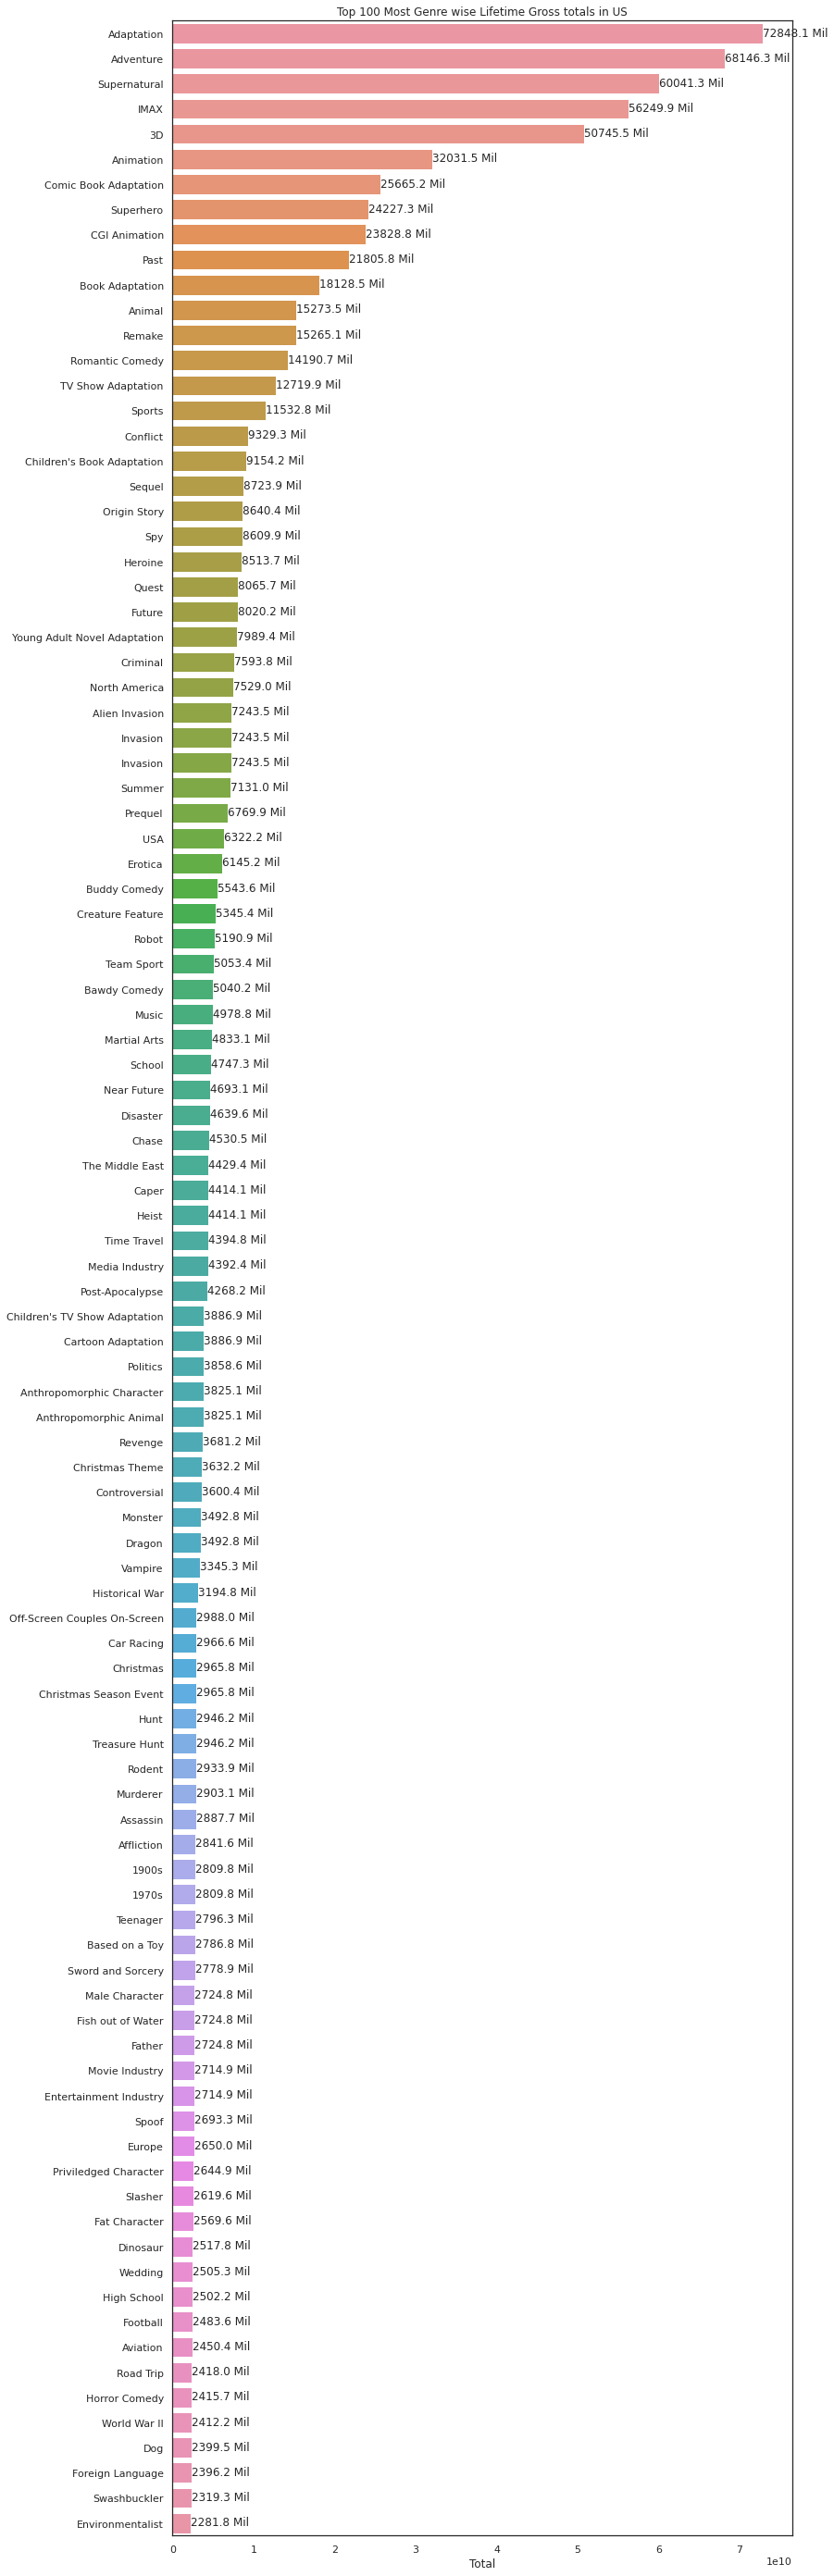

In [26]:
#1 Title', 'Lifetime Gross'
plt.figure(figsize=(12, 50))
genres = genres.fillna(0)
#set seaborn plotting aesthetics
sns.set(style='white')

ax = sns.barplot(y='Genre', x='Total', data=genres, 
                 order=genres.sort_values('Total',
                                          ascending=False).Genre.head(100), 
                 orient='h')


for p in ax.patches:
    ax.annotate( '{:.1f} Mil'.format(int(p.get_width())/1000000), (p.get_width(), p.get_y()+0.5), fontsize=12)
#    ax.annotate( genres['#1 Title'], (p.get_width()/2, p.get_y()+0.5), fontsize=12)
plt.title('Top 100 Most Genre wise Lifetime Gross totals in US', fontsize=12)
plt.ylabel('')
plt.show()




In [27]:
franchises.head()

Franchise       Total  Releases  \
0        Marvel Cinematic Universe  9892046843        30   
1                        Star Wars  5081703177        21   
2  Disney Live Action Reimaginings  3493794115        17   
3                       Spider-Man  3269168524        10   
4   J.K. Rowling's Wizarding World  2787740350        27   

                                     #1 Release  Lifetime Gross  
0                             Avengers: Endgame       858373000  
1    Star Wars: Episode VII - The Force Awakens       936662225  
2                                 The Lion King       543638043  
3                       Spider-Man: No Way Home       772170405  
4  Harry Potter and the Deathly Hallows: Part 2       381011219

In [28]:
franchises['average'] = franchises['Total']/franchises['Releases']
franchises.head()





Franchise       Total  Releases  \
0        Marvel Cinematic Universe  9892046843        30   
1                        Star Wars  5081703177        21   
2  Disney Live Action Reimaginings  3493794115        17   
3                       Spider-Man  3269168524        10   
4   J.K. Rowling's Wizarding World  2787740350        27   

                                     #1 Release  Lifetime Gross       average  
0                             Avengers: Endgame       858373000  3.297349e+08  
1    Star Wars: Episode VII - The Force Awakens       936662225  2.419859e+08  
2                                 The Lion King       543638043  2.055173e+08  
3                       Spider-Man: No Way Home       772170405  3.269169e+08  
4  Harry Potter and the Deathly Hallows: Part 2       381011219  1.032496e+08

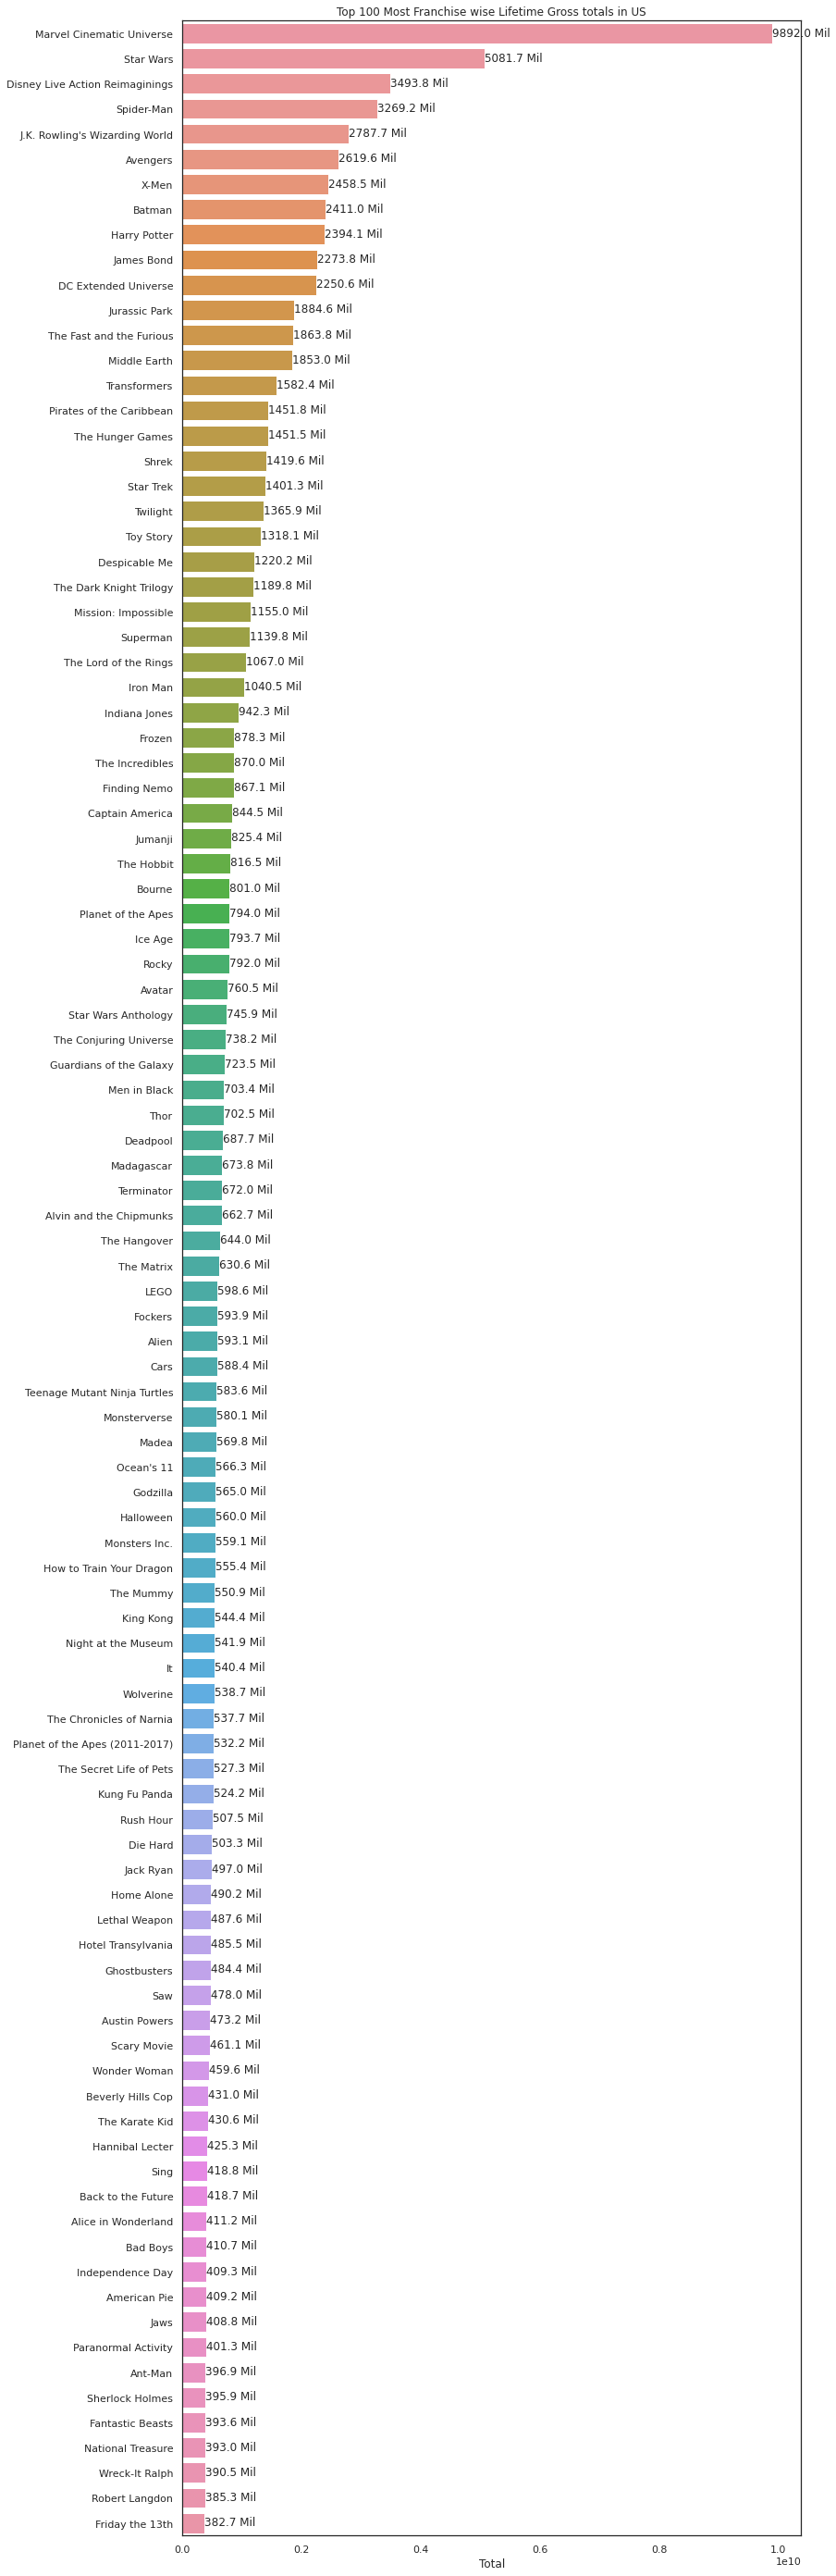

In [29]:
#1 Title', 'Lifetime Gross'
plt.figure(figsize=(12, 50))
franchises = franchises.fillna(0)
#set seaborn plotting aesthetics
sns.set(style='white')

ax = sns.barplot(y='Franchise', x='Total', data=franchises, 
                 order=franchises.sort_values('Total',
                                          ascending=False).Franchise.head(100),
                 orient='h')


for p in ax.patches:
    ax.annotate( '{:.1f} Mil'.format(int(p.get_width())/1000000), (p.get_width(), p.get_y()+0.5), fontsize=12)
#    ax.annotate( genres['#1 Title'], (p.get_width()/2, p.get_y()+0.5), fontsize=12)
plt.title('Top 100 Most Franchise wise Lifetime Gross totals in US', fontsize=12)
plt.ylabel('')
plt.show()

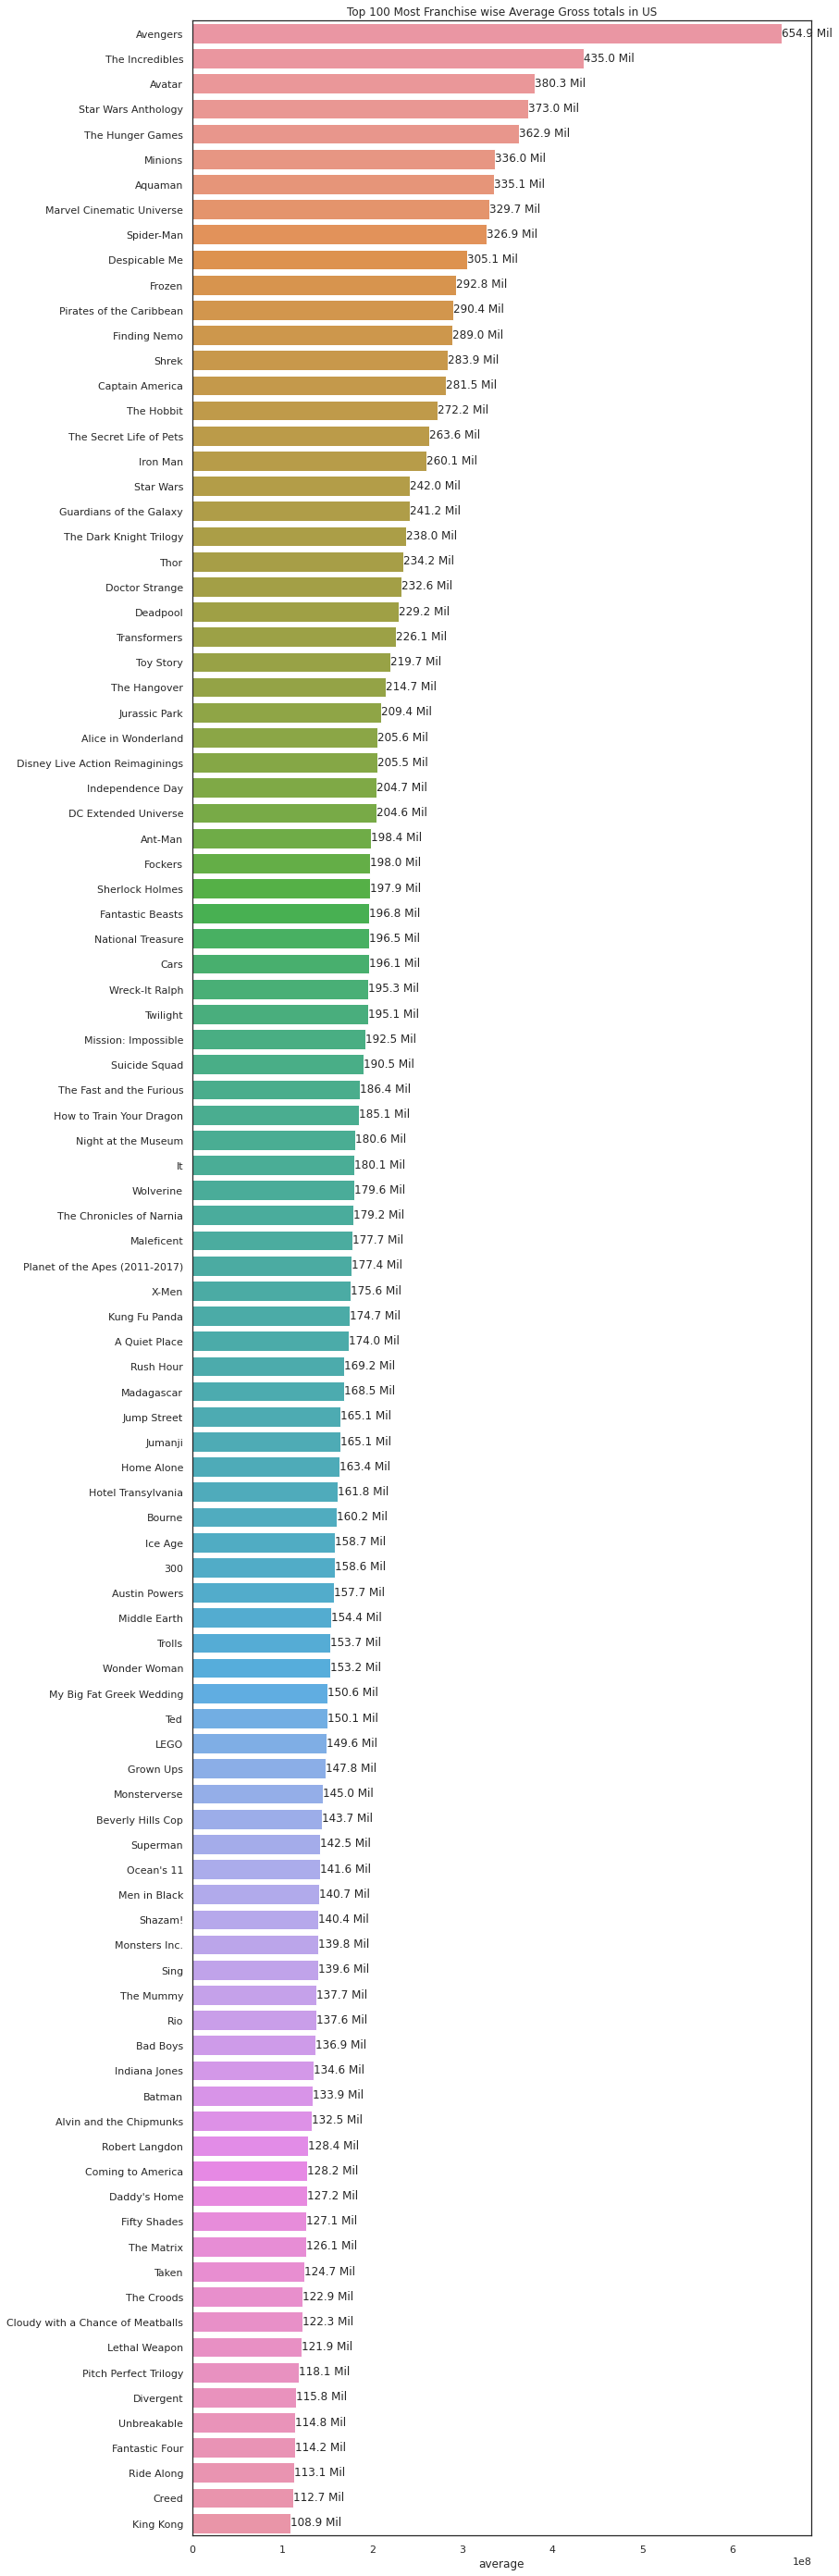

In [30]:
#1 Title', 'Lifetime Gross'
plt.figure(figsize=(12, 50))
franchises = franchises.fillna(0)
#set seaborn plotting aesthetics
sns.set(style='white')

ax = sns.barplot(y='Franchise', x='average', data=franchises, 
                 order=franchises.sort_values('average',
                                          ascending=False).Franchise.head(100),
                 orient='h')


for p in ax.patches:
    ax.annotate( '{:.1f} Mil'.format(int(p.get_width())/1000000), (p.get_width(), p.get_y()+0.5), fontsize=12)
#    ax.annotate( genres['#1 Title'], (p.get_width()/2, p.get_y()+0.5), fontsize=12)
plt.title('Top 100 Most Franchise wise Average Gross totals in US', fontsize=12)
plt.ylabel('')
plt.show()

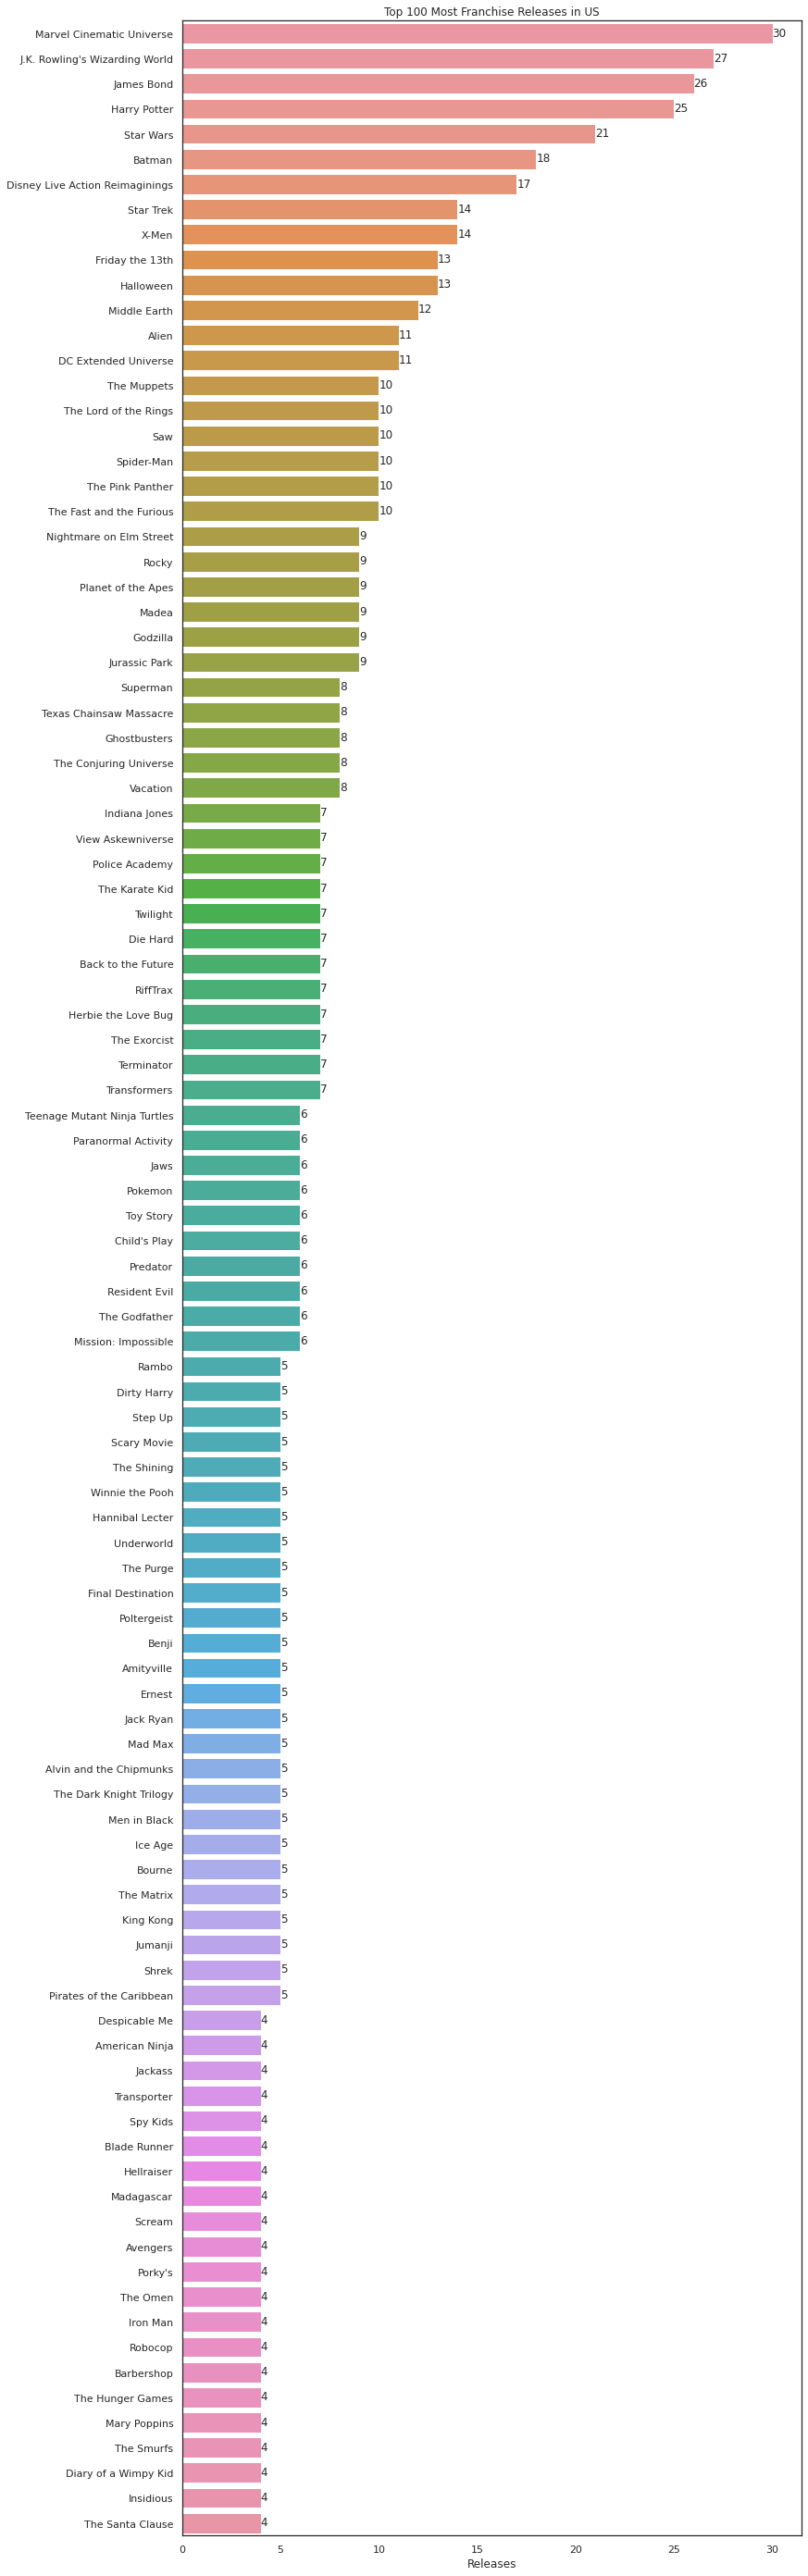

In [31]:
#1 Title', 'Lifetime Gross'
plt.figure(figsize=(12, 50))
franchises = franchises.fillna(0)
#set seaborn plotting aesthetics
sns.set(style='white')

ax = sns.barplot(y='Franchise', x='Releases', data=franchises, 
                 order=franchises.sort_values('Releases',
                                          ascending=False).Franchise.head(100),
                 orient='h')


for p in ax.patches:
    ax.annotate( '{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
#    ax.annotate( genres['#1 Title'], (p.get_width()/2, p.get_y()+0.5), fontsize=12)
plt.title('Top 100 Most Franchise Releases in US', fontsize=12)
plt.ylabel('')
plt.show()

In [32]:
import plotly.express as px


fig = px.bar(franchises, y="Franchise", x=["Total","Lifetime Gross"], hover_data=['Franchise','#1 Release','average'],title="Plotly bar chart", height=2600)
fig.show()

In [33]:
import plotly.express as px


fig = px.pie(franchises.head(20), values='average', names='Franchise')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide',title_text='Top 20 Movie Franchises')
fig.show()

In [34]:
import plotly.express as px


fig = px.pie(genres.head(20), values='Total', names='Genre')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide',title_text='Top 20 Genre Franchises')
fig.show()

In [35]:
internationaltop1000.head()

Rank                                       Title  Worldwide Lifetime Gross  \
0     1                                      Avatar                2847246203   
1     2                           Avengers: Endgame                2797501328   
2     3                                     Titanic                2201647264   
3     4  Star Wars: Episode VII 0 The Force Awakens                2069521700   
4     5                      Avengers: Infinity War                2048359754   

   Domestic Lifetime Gross   Domestic %   Foreign Lifetime Gross   Foreign %   \
0                760507625          0.27              2086738578         0.73   
1                858373000          0.31              1939128328         0.69   
2                659363944          0.30              1542283320         0.70   
3                936662225          0.45              1132859475         0.55   
4                678815482          0.33              1369544272         0.67   

   Year  
0  2009  
1  2019  
2  1997  
3  2015  
4  2018

In [36]:
for x in range(0, 1000, 50):
    startrow=x
    endrow=x+50
    temprows=internationaltop1000.iloc[startrow:endrow]
    fig = px.treemap(temprows, 
                     path=[px.Constant("Year"), "Title",'Worldwide Lifetime Gross', 'Domestic Lifetime Gross', 'Foreign Lifetime Gross'], 
                     values='Worldwide Lifetime Gross')
    fig.update_traces(root_color="lightgrey")
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig.show()

In [37]:
import plotly.express as px
import numpy as np
#df = px.data.gapminder().query("year == 2007")
for x in range(0, 1000, 10):
    startrow=x
    endrow=x+10
    temprows=internationaltop1000.iloc[startrow:endrow]
    fig = px.sunburst(temprows,  
                      path=[px.Constant("Year"),'Worldwide Lifetime Gross', 'Domestic Lifetime Gross', 'Foreign Lifetime Gross',"Title",], 
                      values='Worldwide Lifetime Gross',
                      color='Year', 
                      hover_data=[ "Title",'Worldwide Lifetime Gross', 'Domestic Lifetime Gross', 'Foreign Lifetime Gross'],
                     # color_continuous_scale='RdBu',
                     # color_continuous_midpoint=np.average(internationaltop1000['Worldwide Lifetime Gross'], 
                     #                                      weights=internationaltop1000['Domestic Lifetime Gross'])
                     )
    fig.show()

# Work In Progress